# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arka Jenar Ma'arif
- **Email:** jenararka019@gmail.com
- **ID Dicoding:** MS149D5Y0615

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca mempengaruhi jumlah rata-rata peminjaman sepeda dalam satu tahun?
- Apa pengaruh musim pada pola peminjaman sepeda dalam satu tahun ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_day = pd.read_csv('data/day.csv', sep=',')
data_hour = pd.read_csv('data/hour.csv', sep=',')

In [3]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat 2 Dataset yang bisa dianalisis
- Kedua dataset memiliki diambil dari data berbeda dimana day.csv diambil dari data rental per hari sedangkan hour.csv berdasarkan data rental per jam
- Kedua dataset hanya memikili perbedaan di kolom hr dimana dalam dataset day tidak ada

### Assessing Data

In [5]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
#Untuk mengetahui berapa data kategorikal pada day.csv
kategorikal = [x for x in data_day.columns if data_day[x].nunique() < 10]
kategorikal

['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

In [8]:
#Untuk mengetahui berapa data kategorikal pada hour.csv
kategorikal = [x for x in data_hour.columns if data_hour[x].nunique() < 10]
kategorikal

['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

In [9]:
data_day.duplicated().sum()

0

In [10]:
data_hour.duplicated().sum()

0

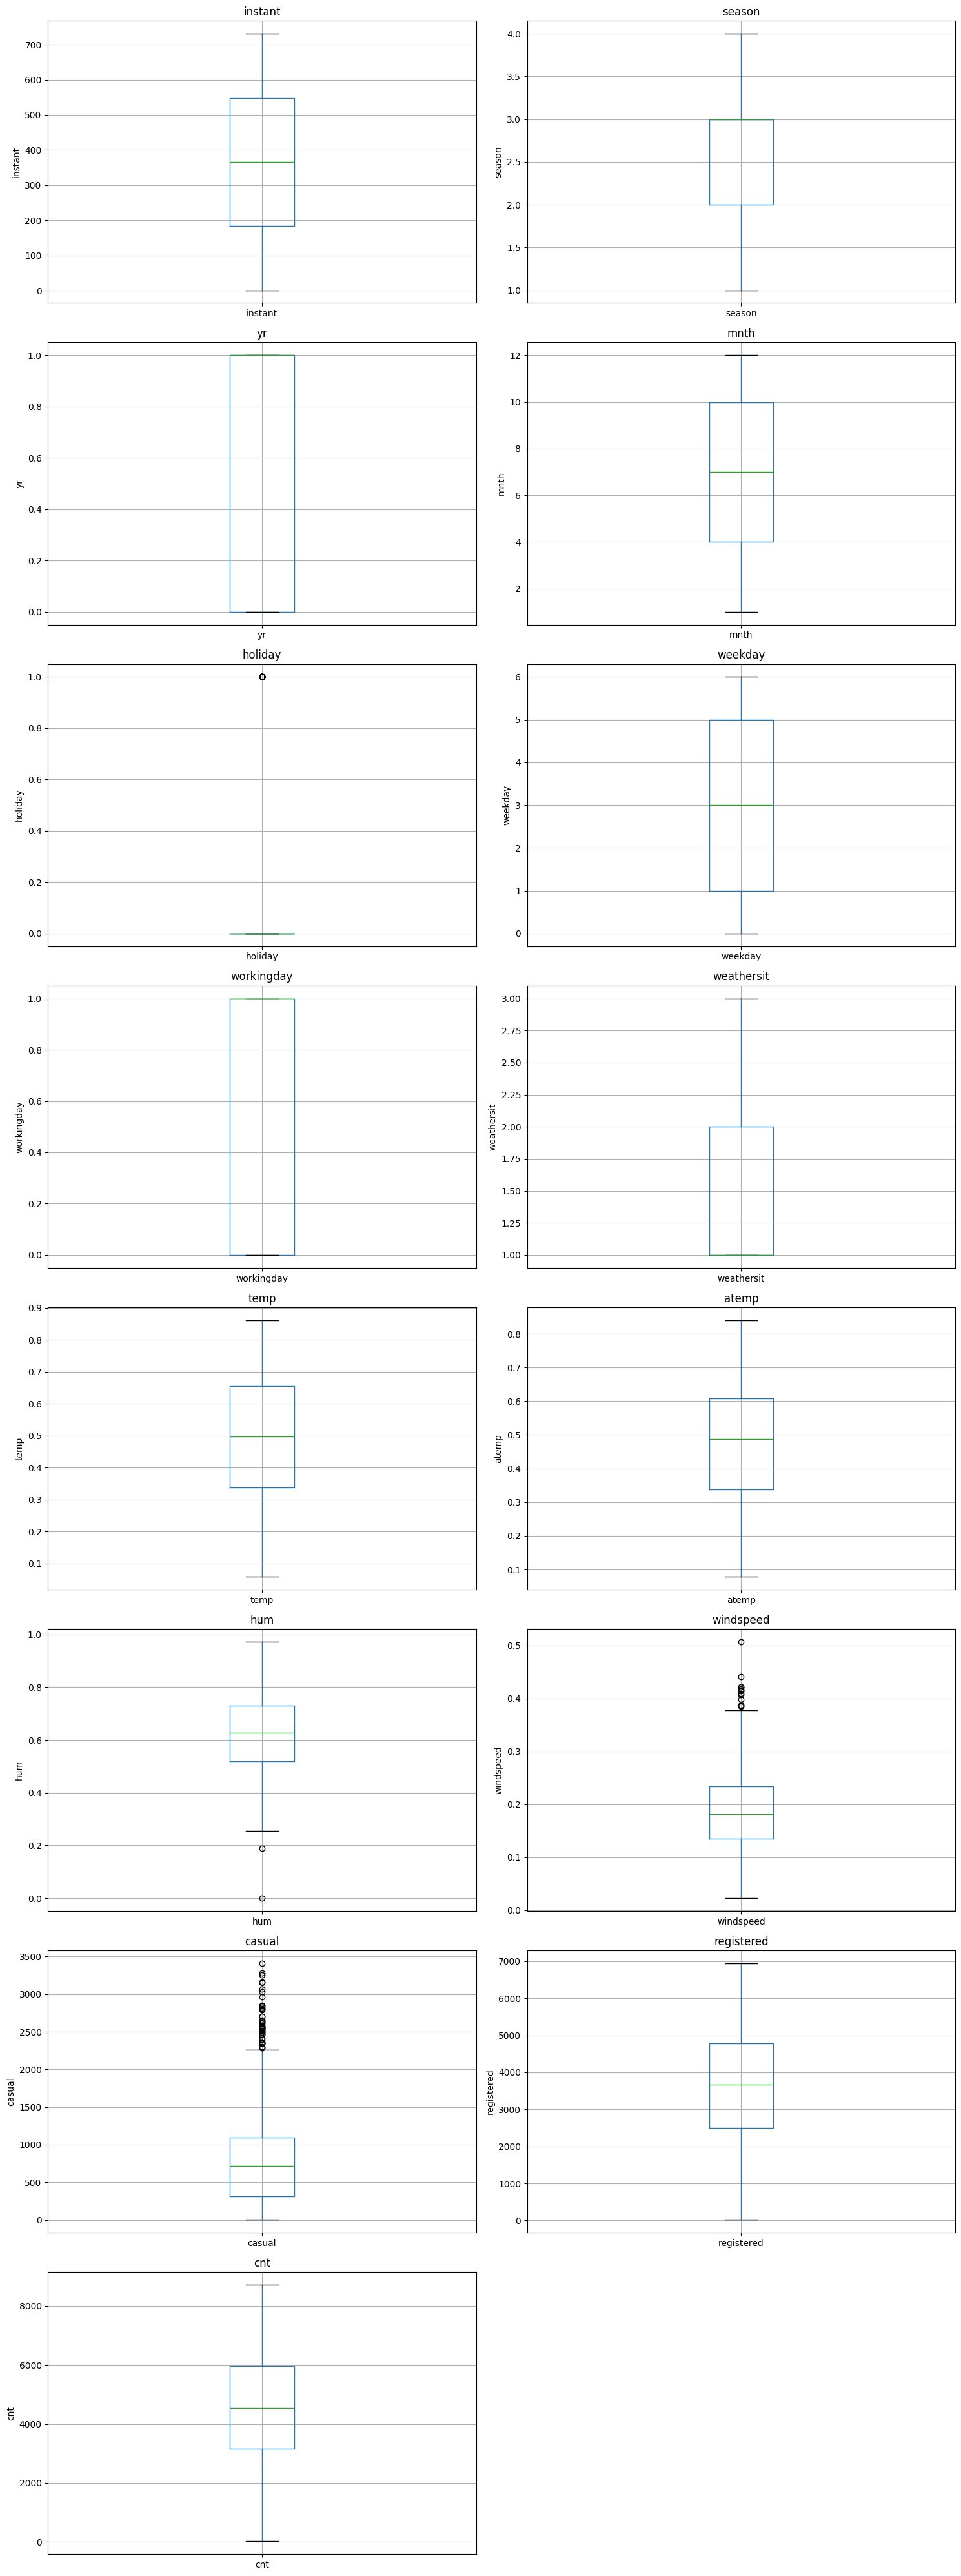

In [11]:
import matplotlib.pyplot as plt
df_numeric = data_day.select_dtypes(include=['number'])

num_cols = len(df_numeric.columns)
rows = (num_cols // 2) + (num_cols % 2)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(rows, 2, i)
    data_day.boxplot(column=col)
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

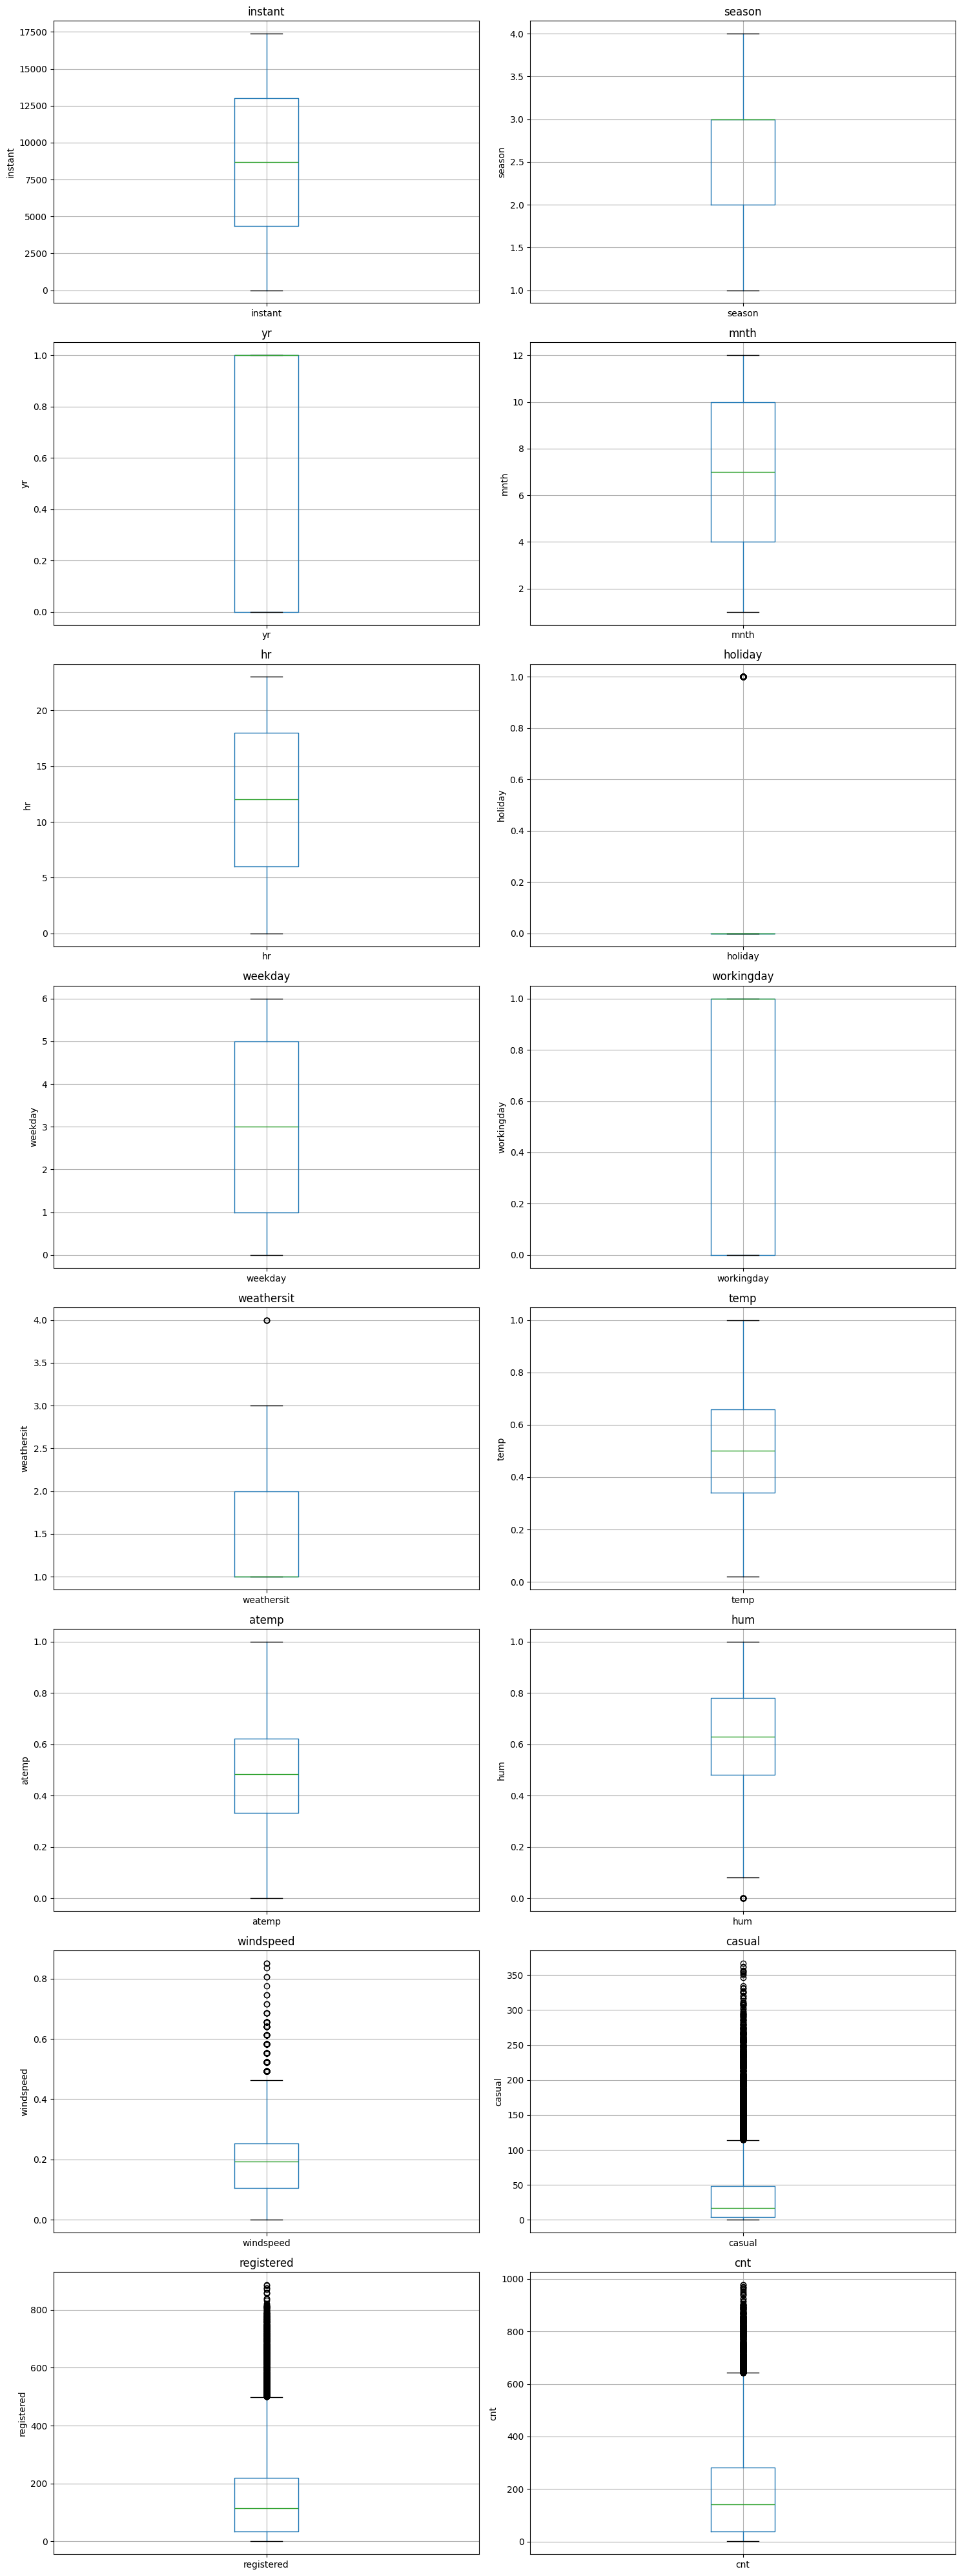

In [12]:
import matplotlib.pyplot as plt
df_numeric = data_hour.select_dtypes(include=['number'])

num_cols = len(df_numeric.columns)
rows = (num_cols // 2) + (num_cols % 2)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(rows, 2, i)
    data_hour.boxplot(column=col)
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Insight:**
- Kedua dataset memiliki data yang cukup bersih dimana tidak ditemukannya data duplikat dan missing_value
- Terdapat beberapa kolom yang terdapat beberapa outlier yaitu kolom windspeed dan hum

### Cleaning Data

In [13]:
data_day = data_day.drop(columns='instant')
data_hour = data_hour.drop(columns='instant')

In [14]:
col_w_outliers = ['windspeed', 'hum']
for i in col_w_outliers:
    q1 = data_day[i].quantile(0.25)
    q3 = data_day[i].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data_day.loc[data_day[i]<lower_limit,i]=lower_limit
    data_day.loc[data_day[i]>upper_limit,i]=upper_limit

In [15]:
col_w_outliers = ['windspeed', 'hum']
for i in col_w_outliers:
    q1 = data_hour[i].quantile(0.25)
    q3 = data_hour[i].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data_hour.loc[data_hour[i]<lower_limit,i]=lower_limit
    data_hour.loc[data_hour[i]>upper_limit,i]=upper_limit

Text(0, 0.5, 'hum')

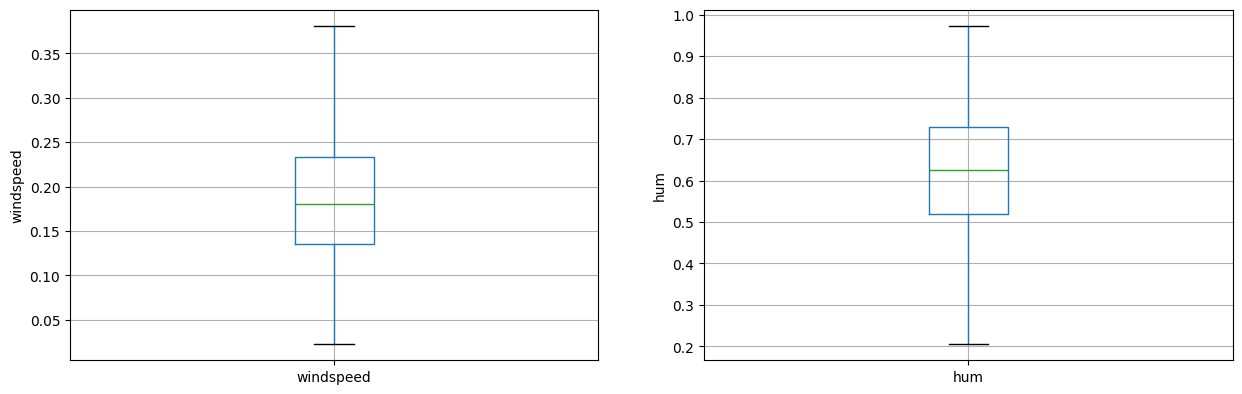

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data_day.boxplot(column='windspeed')
fig.set_title('')
fig.set_ylabel('windspeed')

plt.subplot(2, 2, 2)
fig = data_day.boxplot(column='hum')
fig.set_title('')
fig.set_ylabel('hum')

Text(0, 0.5, 'hum')

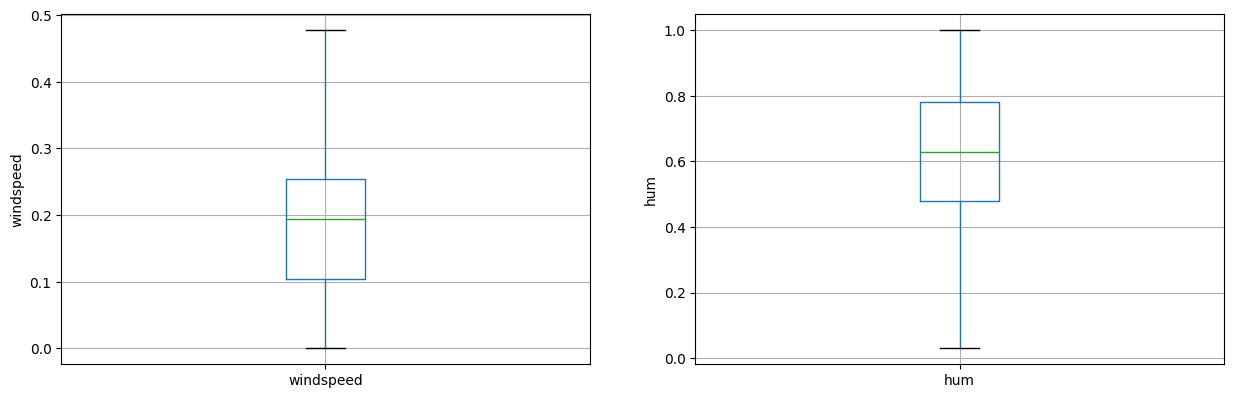

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data_hour.boxplot(column='windspeed')
fig.set_title('')
fig.set_ylabel('windspeed')

plt.subplot(2, 2, 2)
fig = data_hour.boxplot(column='hum')
fig.set_title('')
fig.set_ylabel('hum')

**Insight:**
- Karena tidak adanya duplikasi dan mising value maka tidak perlu melakukan pembersihan duplikasi dan missing valur
- terdapat data (bukan merupakan data target [casual, registered, cnt]) yang masih ada outlier, dibersikan menggunakan metode lower limit dan upper limit

## Exploratory Data Analysis (EDA)

### Explore Dataset Hour dan Day berdasarkan weather dan season

In [18]:
data_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628197,0.189846,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.141320,0.075644,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.380611,3410.000000,6946.000000,8714.000000


In [19]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])

In [20]:
# Mapping nilai kategori season dan weathersit
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
data_day['season'] = data_day['season'].map(season_mapping)
data_day['weathersit'] = data_day['weathersit'].map(weather_mapping)

In [21]:
# Konversi skala normalisasi ke rentang yang sesuai
data_day['temp'] = data_day['temp'] * 41
data_day['atemp'] = data_day['atemp'] * 50
data_day['hum'] = data_day['hum'] * 100
data_day['windspeed'] = data_day['windspeed'] * 67

In [22]:
data_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

In [24]:
# Mapping nilai kategori season dan weathersit
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
data_hour['season'] = data_hour['season'].map(season_mapping)
data_hour['weathersit'] = data_hour['weathersit'].map(weather_mapping)

In [25]:
# Konversi skala normalisasi ke rentang yang sesuai
data_hour['temp'] = data_hour['temp'] * 41
data_hour['atemp'] = data_hour['atemp'] * 50
data_hour['hum'] = data_hour['hum'] * 100
data_hour['windspeed'] = data_hour['windspeed'] * 67

In [37]:
data_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,1,0,0,6,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,0,6,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,0,6,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,0,6,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,0,6,0,Clear,9.84,14.395,75.0,0.0,0,1,1


In [27]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'], errors='coerce')
# Ekstrak tahun dan bulan
data_day['yr'] = data_day['dteday'].dt.year
data_day['mnth'] = data_day['dteday'].dt.month

In [28]:
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'], errors='coerce')
# Ekstrak tahun dan bulan
data_hour['yr'] = data_hour['dteday'].dt.year
data_hour['mnth'] = data_hour['dteday'].dt.month

In [29]:
avg_day_rentals_by_weathersits = data_day.groupby("weathersit")["cnt"].sum().reset_index()
avg_day_rentals_by_weathersits

,weathersit,cnt
0,Clear,2257952
1,Cloudy,996858
2,Light Rain/Snow,37869


In [30]:
avg_hour_rentals_by_weathersits = data_hour.groupby("weathersit")["cnt"].sum().reset_index()
avg_hour_rentals_by_weathersits

,weathersit,cnt
0,Clear,2338173
1,Cloudy,795952
2,Heavy Rain/Snow,223
3,Light Rain/Snow,158331


In [31]:
avg_day_rentals_by_seasons = data_day.groupby("season")["cnt"].sum().reset_index()
avg_day_rentals_by_seasons

,season,cnt
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


In [32]:
avg_hour_rentals_by_seasons = data_hour.groupby("season")["cnt"].sum().reset_index()
avg_hour_rentals_by_seasons

,season,cnt
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


**Insight:**
- Berdasarkan analisa diatas kedua dataset menunjukan rata rata peminjaman sepeda yang mirip dimana semakin buruk cuacanya akan semakin kecil dan semakin cerah semakin banyak
- Kedua dataset memiliki juga memiliki kemiripan dimana rata rata peminjaman sepeda paling besar ada dimusim gugur dan musim panas

## Visualization & Explanatory Analysis

### Bagaimana kondisi cuaca mempengaruhi jumlah rata-rata peminjaman sepeda dalam satu tahun?

C:\Users\ARKA JENAR\AppData\Local\Temp\ipykernel_832\1107840037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_day, x="weathersit", y="cnt", palette="viridis", estimator=np.mean)


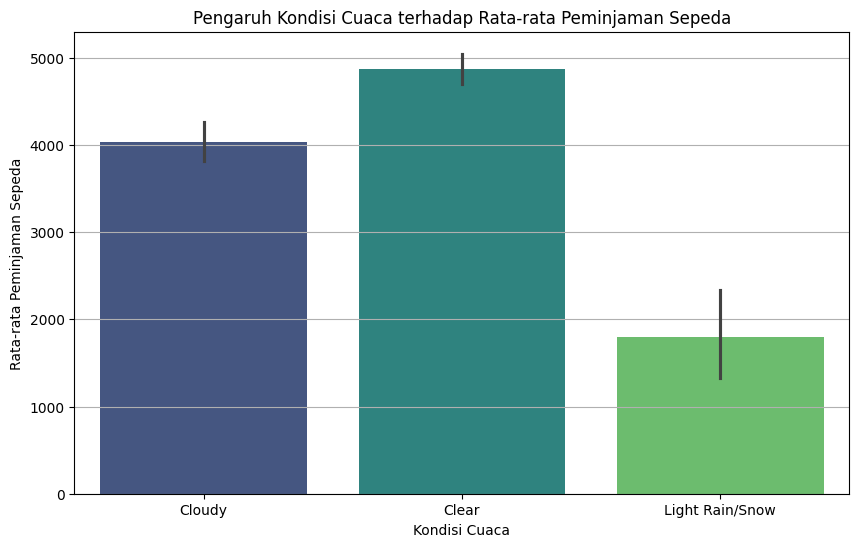

In [33]:
import numpy as np

# Rata-rata peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(data=data_day, x="weathersit", y="cnt", palette="viridis", estimator=np.mean)
plt.title("Pengaruh Kondisi Cuaca terhadap Rata-rata Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.grid(axis="y")
plt.show()

C:\Users\ARKA JENAR\AppData\Local\Temp\ipykernel_832\2183507868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_hour, x="weathersit", y="cnt", palette="viridis", estimator=np.mean)


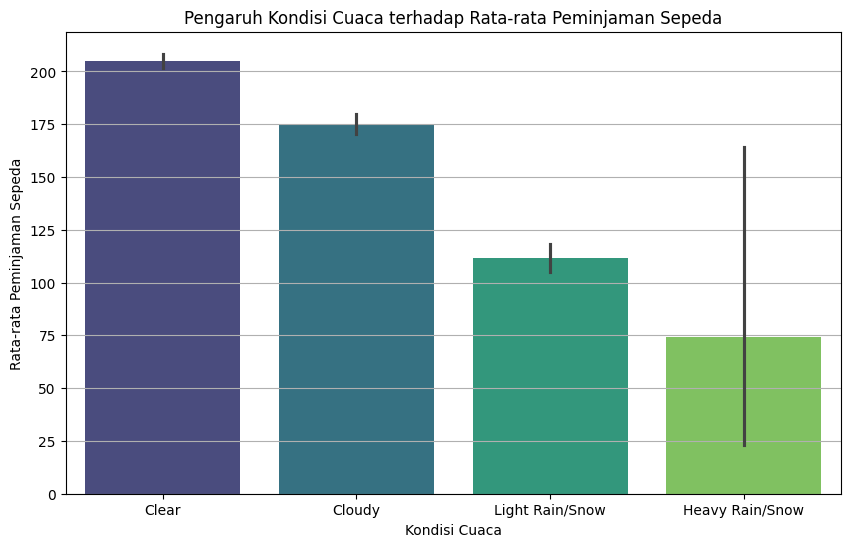

In [34]:
import numpy as np

# Rata-rata peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(data=data_hour, x="weathersit", y="cnt", palette="viridis", estimator=np.mean)
plt.title("Pengaruh Kondisi Cuaca terhadap Rata-rata Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.grid(axis="y")
plt.show()

### Apa pengaruh musim pada pola peminjaman sepeda dalam satu tahun ?

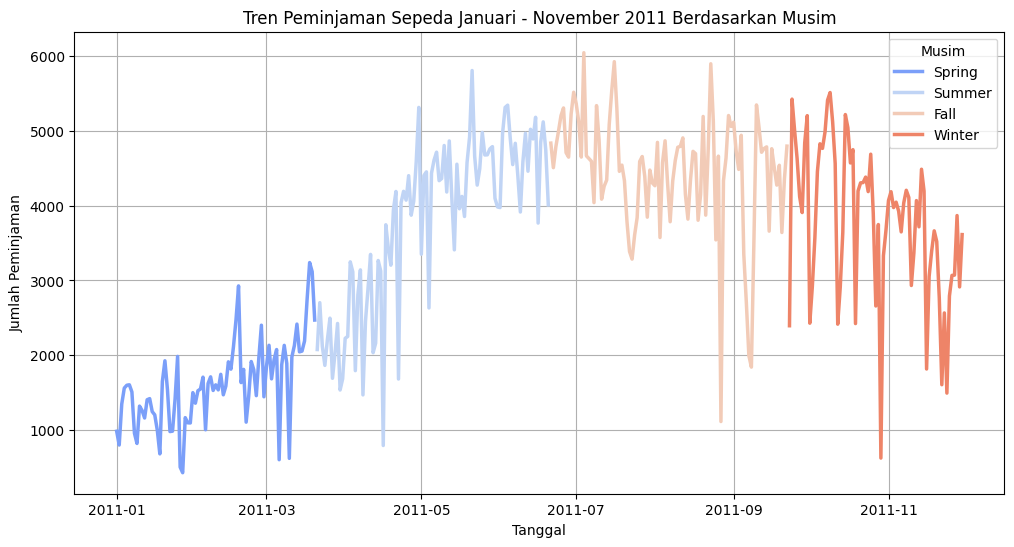

In [35]:
# Filter data hanya sampai November 2011
df_filtered = data_day[(data_day['dteday'] >= "2011-01-01") & (data_day['dteday'] <= "2011-11-30")]

# Plot tren peminjaman sepeda sepanjang tahun (hingga November 2011) dengan musim
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="dteday", y="cnt", hue="season", palette="coolwarm", linewidth=2.5)
plt.title("Tren Peminjaman Sepeda Januari - November 2011 Berdasarkan Musim")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Musim")
plt.grid(True)
plt.show()

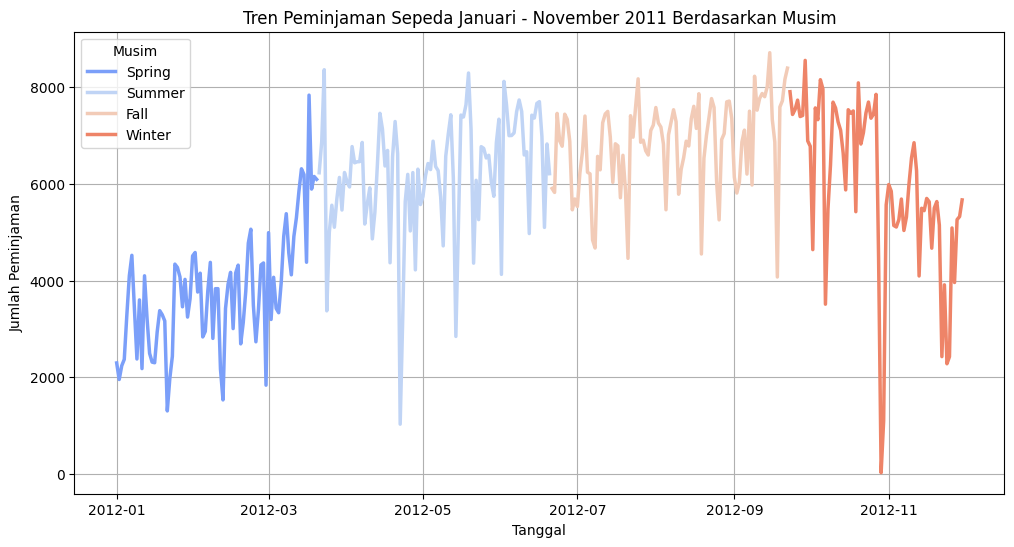

In [36]:
# Filter data hanya sampai November 2011
df_filtered = data_day[(data_day['dteday'] >= "2012-01-01") & (data_day['dteday'] <= "2012-11-30")]

# Plot tren peminjaman sepeda sepanjang tahun (hingga November 2011) dengan musim
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="dteday", y="cnt", hue="season", palette="coolwarm", linewidth=2.5)
plt.title("Tren Peminjaman Sepeda Januari - November 2011 Berdasarkan Musim")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Musim")
plt.grid(True)
plt.show()

**Insight:**
- Peminjaman paling banyak terjadi pada saat cuaca cerah
- Terlihat dari pola peminjaman sepeda peminjaman paling rendah ada pada musim semi dan mulai meningkat pada musim panas dan paling tinggi ada di musim gugur, kemudian kembali mengalami penurunan pada musim dingin

## Analisis Lanjutan (Opsional)

## Conclusion

- Pengaruh Cuaca terhadap Peminjaman Sepeda: Kondisi cuaca yang cerah (Clear) mendorong lebih banyak peminjaman sepeda.
Cuaca buruk seperti hujan atau salju (Light Rain/Snow dan Heavy Rain/Snow) menyebabkan penurunan peminjaman sepeda.

- Pengaruh Musim terhadap Peminjaman Sepeda: Peminjaman sepeda paling tinggi pada musim gugur (Fall), diikuti oleh musim panas (Summer).
Peminjaman cenderung lebih rendah di musim semi (Spring) dan paling sedikit di musim dingin (Winter). Dilihat dari grafik kedua dataset peningkatan peminjaman sepeda pada musim panas dan puncaknya ada di musim gugur, barulah kemudian mengalami penurunan pada musim dingin dan musim semi

Untuk meningkatkan efisiensi sistem penyewaan sepeda dan menjaga kestabilan jumlah peminjaman, berikut beberapa strategi yang dapat diterapkan:  

1. **Penyesuaian Tarif Musiman**  
   - Menerapkan tarif diskon atau promosi pada musim hujan untuk menarik lebih banyak pelanggan.  
   - Meningkatkan harga sedikit saat musim dengan permintaan tinggi untuk mengoptimalkan pendapatan.  

2. **Penyediaan Fasilitas Pelindung Cuaca**  
   - Menyediakan jas hujan gratis atau dengan harga terjangkau bagi pelanggan saat cuaca hujan deras.  
   - Menyediakan tempat parkir sepeda dengan atap di beberapa lokasi strategis untuk melindungi sepeda dari hujan.  